# Parte 4 - Análise de Investimentos para Criptomoedas - O Projeto Cardano [ADA]

---

In [55]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [56]:
#importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as smt
import yfinance as yf
from matplotlib import pyplot as plt
from datetime import datetime as dt
import seaborn as sns

## Sumário <a id="0"></a>

<br>[7. Construção dos Modelos - Previsão de Preços para Criptomoedas: O Projeto Cardano [ADA-USD]](#7)
 - [7.1 Coleta de dados e pré-processamento para os Modelos](#7-1)

 - [7.2 Plotagem dos Gráficos da Cardano, do Bitcoin e do Ethereum para comparação](#7-2)

 - [7.3 Plotagem de algumas Estatísticas](#7-3)

     - [7.3.1 Preços e Histograma dos Preços](#7-3-1)

     - [7.3.2 Condições Estacionárias e Normalização](#7-3-2)

     - [7.3.3 Plotagem dos Dados Normalizados](#7-3-3)

     - [7.3.4 Coeficiente de Correlação e Regressão Linear Múltipla por Mínimos Quadrados Comuns (OLS)](#7-3-4)


 - [7.4 Previsão de Preços utilizando o Facebook Prophet](#7-4)

     - [7.4.1 Previsão do Preço de Fechamento para o Projeto Cardano [ADA-USD]](#7-4-1)

     - [7.4.2 Previsão do Volume para o Projeto Cardano [ADA-USD]](#7-4-1)


<br>[8. Análise Macro Econômica dos Mercados (Into The Block)](#8)
 - [8.1 Mercados Ocidentais](#8-1)
     - [8.1.1 Price Performance Western Markets](#8-1-1)<br><br>
     - [8.1.2 Volatility Western Markets](#8-1-2)<br><br>
     - [8.1.3 BTC Historical Correlation Western Markets](#8-1-3)<br><br>
     - [8.1.4 ETH Historical Correlation Western Markets](#8-1-4)<br><br>
     - [8.1.5 Sharpe Ratio Western Markets](#8-1-5)<br><br>
     - [8.1.6 Sortino Ratio Western Markets](#8-1-6)<br><br>
 
 - [8.2 Mercados Orientais](#8-2)
     - [8.2.1 Price Performance Eastern Markets](#8-2-1)<br><br>
     - [8.2.2 Volatility Eastern Markets](#8-2-2)<br><br>
     - [8.2.3 BTC Historical Correlation Eastern Markets](#8-2-3)<br><br>
     - [8.2.4 ETH Historical Correlation Eastern Markets](#8-2-4)<br><br>
     - [8.2.5 Sharpe Ratio Eastern Markets](#8-2-5)<br><br>
     - [8.2.6 Sortino Ratio Eastern Markets](#8-2-6)<br><br>
 
 - [8.3 Mercados de Cryptomoedas](#8-3)
     - [8.3.1 Price Performance Crypto Related Markets](#8-3-1)<br><br>
     - [8.3.2 Volatility Crypto Related Markets](#8-3-2)<br><br>
     - [8.3.3 BTC Historical Correlation Crypto Related Markets](#8-3-3)<br><br>
     - [8.3.4 ETH Historical Correlation Crypto Related Markets](#8-3-4)<br><br>
     - [8.3.5 Sharpe Ratio Crypto Related Markets](#8-3-5)<br><br>
     - [8.3.6 Sortino Ratio Crypto Related Markets](#8-3-6)<br><br>
 
 - [8.4 Google Trends](#8-4)
     - [8.4.1 Google Trends ADA, BTC e ETH 5YRS](#8-4-1)<br><br>
     - [8.4.2 Google Trends ADA 5YRS](#8-4-2)<br>

<br>[9. Conclusões - Sugestões sobre Investimento](#9)
 - [9.1 Como maximizar seus ganhos de curto prazo?](#9-1)
 
 - [9.2 Quer investir em criptomoedas a longo prazo?](#9-2)
 
 - [9.3 Conclusões em relação ao Projeto Cardano (ADA)](#9-3) 


<br>[10. Referências](#10)


---

# 7. Construção dos Modelos - Previsão de Preços para Criptomoedas: O Projeto Cardano [ADA-USD]<a id="7"></a>

---

## 7.1 Coleta de dados e pré-processamento para os Modelos <a id="7-1"></a>

Portanto, a primeira coisa que queremos fazer é coletar dados. Usaremos o Yahoo Bitcoin History, os dados são gratuitos para download. Disponível [aqui](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD&guccounter=1&guce_referrer=aHR0cHM6Ly90b3dhcmRzZGF0YXNjaWVuY2UuY29tL3ByZWRpY3RpbmctcHJpY2VzLW9mLWJpdGNvaW4td2l0aC1tYWNoaW5lLWxlYXJuaW5nLTNlODNiYjRkZDM1Zg&guce_referrer_sig=AQAAADw3s4Aaum1jPPN-7OIUDQmu6j4SiVGzs0U51SpDhE84Ec30JpqsegxOZYH5lnrNdcM-ZqTtFRI7VLXpikmV4GPDk1ZDnQeBQrtA4W96EdxGo0dwZbtcLWqtK3z3POErPkEb1VvQe0PF8fBlArbyg2HguzJ8pEXcT7ptl3tqR5iZ).

Também estamos usando os dados históricos de futuros do índice de dólares norte-americanos da Investing.com. Disponível [aqui](https://www.investing.com/currencies/us-dollar-index-historical-data).

Queremos ter certeza de que estamos usando dados históricos suficientes para tornar o modelo mais preciso. Estamos usando dados históricos para preços de bitcoin e usd de agosto de 2015 a dezembro de 2020.

---

In [57]:
#reading data into dataframes
bitcoin_usd = yf.Ticker('BTC-USD').history(period='max').reset_index()[['Date','Close','Volume']]
cardano_usd = yf.Ticker('ADA-USD').history(period='max').reset_index()[['Date','Close','Volume']]
ethereum_usd = yf.Ticker('ETH-USD').history(period='max').reset_index()[['Date','Close','Volume']]

In [58]:
#displaying bitcoin dataframe
bitcoin_usd.index = bitcoin_usd['Date']
bitcoin_usd = bitcoin_usd.drop(bitcoin_usd.columns[[0,2]], axis=1)
bitcoin_usd.columns = ['BTC-USD']
bitcoin_usd = bitcoin_usd.loc['2019-01-02':]

In [59]:
bitcoin_usd.head()

,BTC-USD
Date,
2019-01-02,3943.409424
2019-01-03,3836.741211
2019-01-04,3857.717529
2019-01-05,3845.194580
2019-01-06,4076.632568


In [60]:
bitcoin_usd.describe()

,BTC-USD
count,983.000000
mean,18500.463450
std,16623.159349
min,3399.471680
25%,7982.840332
50%,10131.055664
75%,31788.770508
max,63503.457031


In [61]:
#displaying usd dataframe
cardano_usd.index = cardano_usd['Date']
cardano_usd = cardano_usd.drop(cardano_usd.columns[[0,2]], axis=1)
cardano_usd.columns = ['ADA-USD']
cardano_usd = cardano_usd.loc['2019-01-02':]

In [62]:
cardano_usd.head()

,ADA-USD
Date,
2019-01-02,0.045258
2019-01-03,0.042682
2019-01-04,0.043812
2019-01-05,0.044701
2019-01-06,0.049261


In [63]:
cardano_usd.describe()

,ADA-USD
count,983.000000
mean,0.404655
std,0.648596
min,0.023961
25%,0.046074
50%,0.083610
75%,0.307903
max,2.968239


In [64]:
#displaying bitcoin dataframe
ethereum_usd.index = ethereum_usd['Date']
ethereum_usd = ethereum_usd.drop(ethereum_usd.columns[[0,2]], axis=1)
ethereum_usd.columns = ['ETH-USD']
ethereum_usd = ethereum_usd.loc['2019-01-02':]

In [65]:
ethereum_usd.head()

,ETH-USD
Date,
2019-01-02,155.047684
2019-01-03,149.135010
2019-01-04,154.581940
2019-01-05,155.638596
2019-01-06,157.746201


In [66]:
ethereum_usd.describe()

,ETH-USD
count,983.000000
mean,778.094054
std,981.692410
min,104.535301
25%,174.053551
50%,245.016724
75%,1212.782593
max,4168.701172


---

#### [Voltar para o Sumário](#0)

---

## 7.2 Platagem dos Gráficos da Cardano, do Bitcoin e do Ethereum para comparação <a id="7-2"></a>

In [67]:
print(bitcoin_usd.shape)
print(cardano_usd.shape)
print(ethereum_usd.shape)

(983, 1)
(983, 1)
(983, 1)


In [68]:
data = cardano_usd
for x in data.index.values:
    for x2 in bitcoin_usd.index.values:
        if x == x2:
            itemindex = np.where(bitcoin_usd.index==x2)[0][0]
            val = bitcoin_usd.at[x2, 'BTC-USD']
            data.at[x, 'BTC-USD'] = val
    
    for x3 in ethereum_usd.index.values:
        if x == x3:
            itemindex = np.where(ethereum_usd.index==x3)[0][0]
            val = ethereum_usd.at[x3, 'ETH-USD']
            data.at[x, 'ETH-USD'] = val
data.tail()

,ADA-USD,BTC-USD,ETH-USD
Date,,,
2021-09-10,2.385911,44883.910156,3211.505859
2021-09-11,2.633950,45201.457031,3270.278076
2021-09-12,2.581727,46063.269531,3410.134521
2021-09-13,2.400663,44963.074219,3285.511719
2021-09-14,2.408935,46662.355469,3380.655762


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

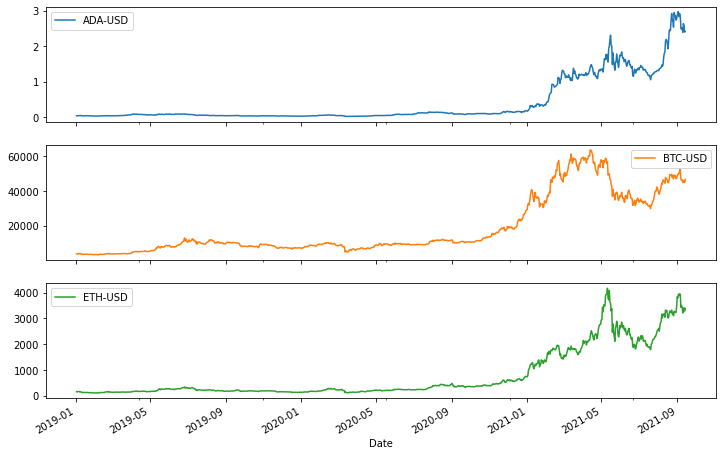

In [69]:
data = data.dropna()
data.plot(subplots=True, figsize=(12,8))

### Ao comparar os preços do Bitcoin, da Cardano e do Ethereum visualmente, podemos ver um pico do Bitcoin no final de 2017 e o consequente pico nos demais projetos. 
### Há um padrão semelhante no ano de 2021.
### Evidenciando certa correlação entre as cryptomoedas e confirmando o Bitcoin como referência para o mercado de cryptomoedas. 

---

#### [Voltar para o Sumário](#0)

---

## 7.3 Plotagem de algumas Estatísticas<a id="7-3"></a>


In [70]:
def plotcharts(data, title, lags=None, figsize=(15,8)):
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    hist_ax = plt.subplot2grid(layout, (0,1))
   
    data.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight="bold")
    data.plot(ax=hist_ax, kind="hist", bins=25)
    hist_ax.set_title("Histogram")

    plt.tight_layout()
    return ts_ax

[Source](https://www.youtube.com/watch?v=_vQ0W_qXMxk&t=1157s)

### 7.3.1 Preços e Histograma dos Preços<a id="7-3-1"></a>



#### Aqui traçamos o preço de fechamento das criptomoedas de 02-01-2019 até o último fechamento.

In [71]:
series = data

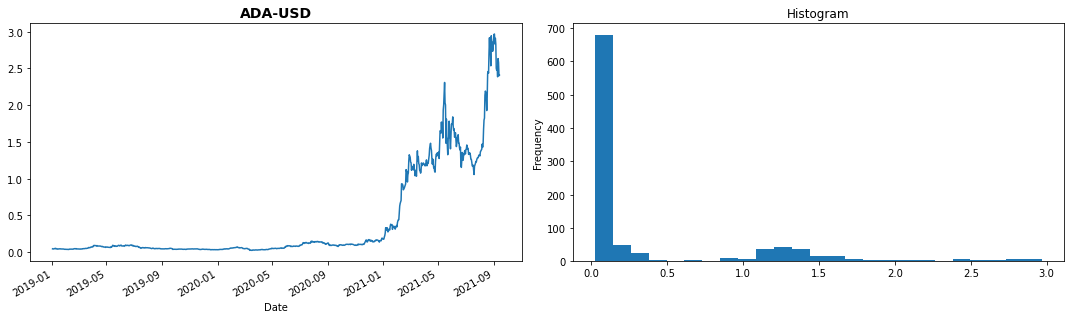

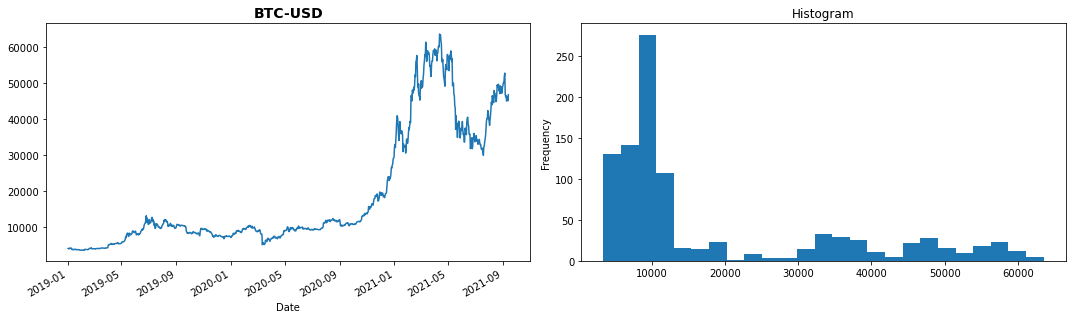

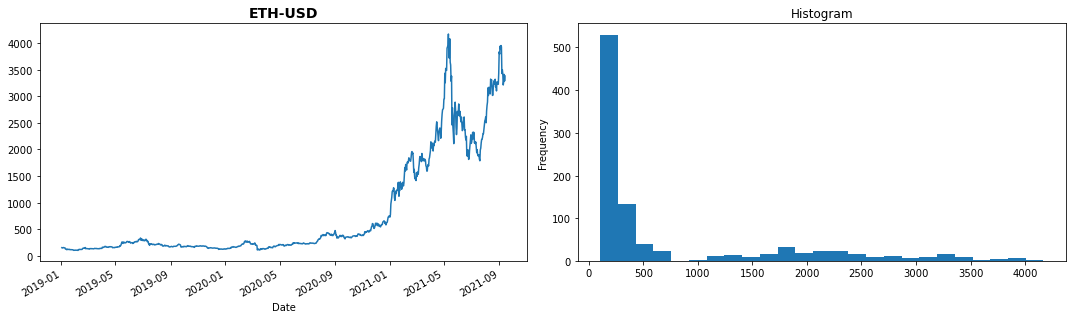

In [72]:
num_var = len(series.iloc[1,:])
for i in range(0, num_var):
    plotcharts(series.iloc[:,i].dropna(), title=series.columns[i], lags=48)

---

#### [Voltar para o Sumário](#0)

---

## 7.3.2 Condições Estacionárias e Normalização<a id="7-3-2"></a>

Os dados da série temporal consistem em quatro componentes principais:

1. Tendência
2. Sazonalidade
3. Ciclicamente
4. Irregularidade, às vezes referida como o componente aleatório

#### Tendência

- Tendência é o aumento ou diminuição da série ao longo de um período de tempo, persiste por um longo período de tempo.
- Exemplo: O crescimento populacional ao longo dos anos pode ser visto como uma tendência ascendente.

#### Sazonalidade

- Padrão regular de flutuações para cima e para baixo.
- É uma variação de curto prazo que ocorre devido a fatores sazonais
- Exemplo: as vendas de sorvete aumentam durante a temporada de verão

#### Ciclos

- É uma variação de médio prazo causada por circunstâncias, que se repetem em intervalos irregulares.
- Exemplo: 5 anos de crescimento econômico, seguido por 2 anos de recessão econômica, seguido por 7 anos de crescimento econômico seguido por 1 ano de recessão econômica

#### Irregularidade

- Refere-se a variações que ocorrem devido a fatores imprevisíveis e também não se repetem em determinados padrões.
- Exemplo: variações causadas por incidentes como terremotos, inundações, guerra, etc.

Se o conjunto de dados apresentar todos os quatro componentes da série temporal, os dados não serão estacionários, o que significa que normalmente esses componentes estarão presentes. Se os dados não forem estacionários, a previsão de série temporal entrará em vigor. Aplicá-lo em um conjunto de dados com cada componente presente não terá um bom desempenho.

Então, como podemos diferenciar essas séries temporais.

A série temporal estacionária depende de:

1. Média
2. Variância
3. Co-variância

## Normalização

Os dados normalizados dentro das estatísticas geralmente envolvem a eliminação de unidades de medida de um conjunto de dados. Como resultado, isso nos permite comparar facilmente os dados com diferentes escalas e são medidos a partir de diferentes fontes.

Por que os dados normalizados são importantes?
Ao treinar um modelo de aprendizado de máquina, nosso objetivo é levar os dados a uma escala comum, de forma que os vários recursos sejam menos sensíveis uns aos outros. Nesse caso, podemos utilizar a normalização de dados como método de transformação de nossos dados, que podem ser de unidades ou escalas diferentes (bitcoin e usd). Isso permite que nosso modelo treine usando recursos que podem levar a previsões mais precisas.

A aplicação de registro diferencial ou sazonal da série deve tornar a série estacionária.

Simplificando, a estacionariedade remove tendências do conjunto de dados que podem ser extremamente intrusivas para nossos modelos.

Basicamente, a estacionariedade faz com que nossos modelos tenham um desempenho e previsões melhores.

,ADA-USD,BTC-USD,ETH-USD
0,0.479124,0.477588,0.479633
1,0.399008,0.437700,0.396042
2,0.472343,0.505241,0.424787
3,0.295648,0.377809,0.377137
4,0.436975,0.459553,0.443773
...,...,...,...
976,0.341811,0.408132,0.383341
977,0.539072,0.484506,0.486419
978,0.299375,0.457405,0.438559
979,0.357839,0.404739,0.355745


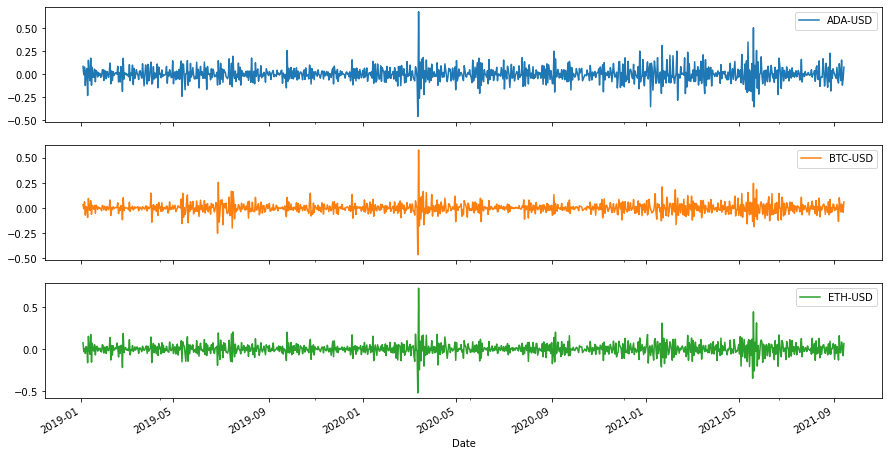

In [73]:
#log normalization
# Converting the data to a logarithmic scale
log = pd.DataFrame(np.log(series))

# Differencing the log values
#1
log_diff = log.diff().dropna()
#2
log_diff = log_diff.diff().dropna()
log_diff.plot(subplots=True)

#normalization
#importing minmaxscaler 
from sklearn.preprocessing import MinMaxScaler

#creating minmaxscaler object
norm = MinMaxScaler()

#applying norm to dataframe
data_norm = pd.DataFrame(norm.fit_transform(log_diff), columns=log_diff.columns)
data_norm

---

### 7.3.3 Platagem dos Dados Normalizados<a id="7-3-3"></a>

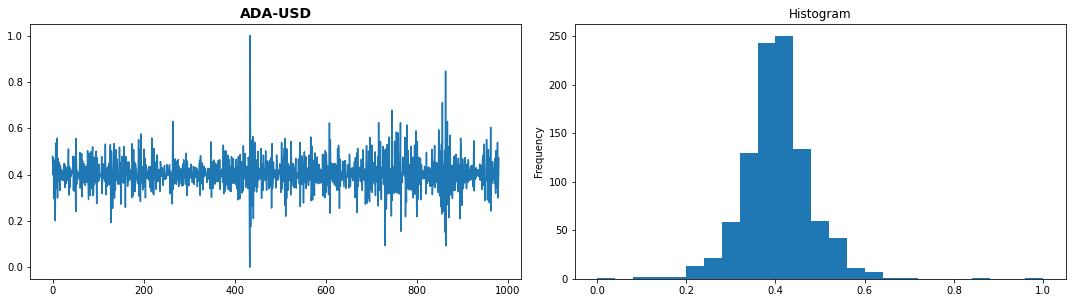

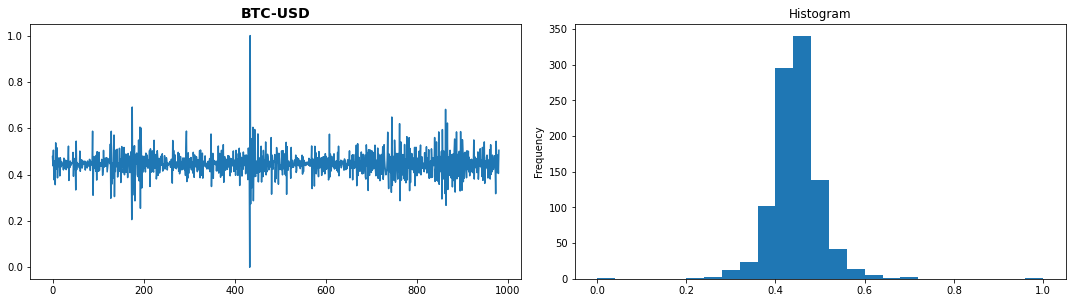

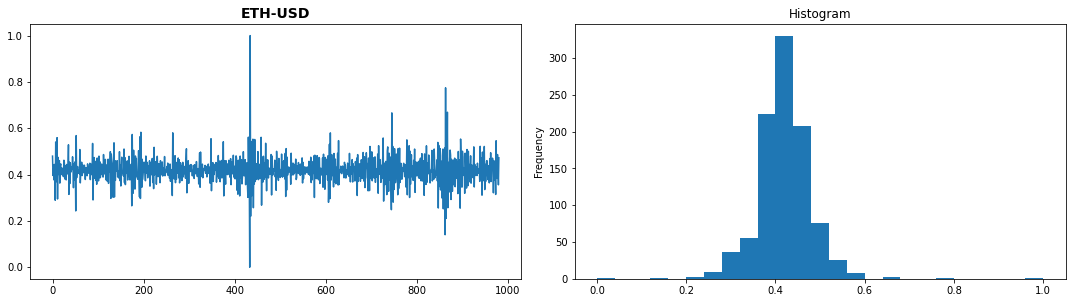

In [74]:
num_var = len(data_norm.iloc[1,:])
for i in range(0, num_var):
    plotcharts(data_norm.iloc[:,i].dropna(), title=data_norm.columns[i], lags=48)

---

#### [Voltar para o Sumário](#0)

---

### 7.3.4 Coeficiente de Correlação e Regressão Linear Múltipla por Mínimos Quadrados Comuns (OLS)<a id="7-3-4"></a> 

In [75]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import graphs 

In [76]:
data.head(3)

,ADA-USD,BTC-USD,ETH-USD
Date,,,
2019-01-02,0.045258,3943.409424,155.047684
2019-01-03,0.042682,3836.741211,149.135010
2019-01-04,0.043812,3857.717529,154.581940


In [77]:
data['BTC-USD'].count()

983

In [78]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ADA-USD,983.0,0.404655,0.648596,0.023961,0.046074,0.083610,0.307903,2.968239
BTC-USD,983.0,18500.463450,16623.159349,3399.471680,7982.840332,10131.055664,31788.770508,63503.457031
ETH-USD,983.0,778.094054,981.692410,104.535301,174.053551,245.016724,1212.782593,4168.701172


In [79]:
print('Com o método describe().T podemos ver que o preço de fechamento do Bitcoin é a variável com maior desvio padrão: USD$ %.2f.' %(data['BTC-USD'].std()))
print('Tendo seu valor mínimo de USD$ %.2f, seu valor máximo de USD$ %.2f e uma média de USD$ %.2f .' %(data['BTC-USD'].min(),data['BTC-USD'].max(),data['BTC-USD'].mean()))

Com o método describe().T podemos ver que o preço de fechamento do Bitcoin é a variável com maior desvio padrão: USD$ 16623.16.
Tendo seu valor mínimo de USD$ 3399.47, seu valor máximo de USD$ 63503.46 e uma média de USD$ 18500.46 .


---

## Coeficiente de Correlação Pearson

- <h4>O coeficiente de correlação é utilizado como uma das ferramentas para averiguar como o preço de uma criptomoeda influencia o preço das demais.</h4>
- <h4>Utilizei os dados de 2019-01-02 em diante pois foi o primero ponto de entrada considerado para a Cardano.</h4>

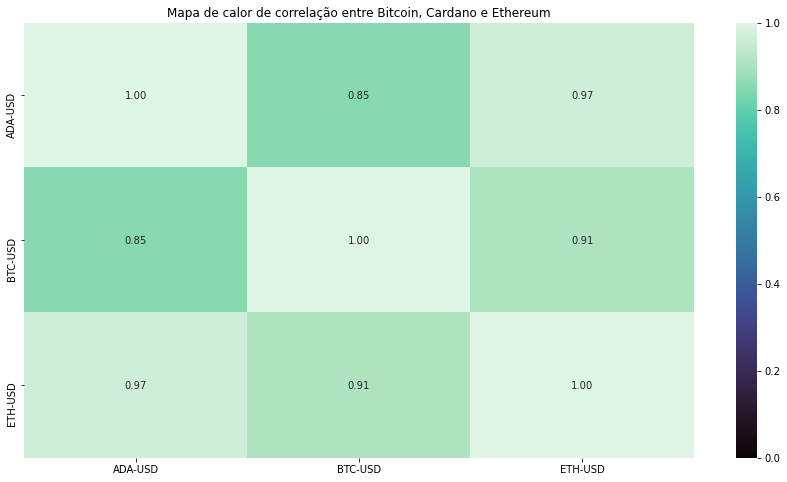

In [80]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(method='pearson'),vmin=0, vmax=1, cmap="mako", annot=True,fmt='0.2f')
plt.title('Mapa de calor de correlação entre Bitcoin, Cardano e Ethereum')
plt.show()

#### Com base no mapa de calor, bem como em alguns dos gráficos anteriores, podemos dizer que as criptomoedas tem uma alta correlação entre si.</strong>

<ol><strong>
    <li>À medida que o volume de transações do Bitcoin aumentou, o volume das outras criptomoedas também aumentou.</li>
    <li>Conforme o preço do Bitcoin aumentou, o preço das outras criptomoedas também aumentou e o inverso se mostrou verdadeiro, quedas no preço do Bitcoin resultaram em quedas para todo o mercado de criptomoedas.</li>
    <li>Os preços das criptomoedas têm forte correlação positiva com o preço do Bitcoin e do Ethereum, dependendo do projeto.</li>
</strong></ol>

---

## Conclusões a partir do Modelo de Regressão Múltipla OLS

#### Após o ajuste do modelo foi feita a regressão OLS de onde podemos ver através do R-squared que 93,4% da variabilidade de minha variável dependente (no caso, o Preço da Cardano) são explicadas pelo modelo. 

#### A estatística F, F-Statistics, nos mostra que há valores significativos para a predição do Preço da Cardano. Com um valor alto de 6895.


In [81]:
X1 = sm.add_constant(data.drop('ADA-USD', axis=1))
y1= data['ADA-USD']
X1.sample(10)

,const,BTC-USD,ETH-USD
Date,,,
2020-06-10,1.0,9870.094727,247.444946
2021-01-11,1.0,35566.656250,1090.145386
2020-02-02,1.0,9344.365234,188.617538
2019-11-09,1.0,8813.582031,185.028717
2019-09-23,1.0,9729.324219,201.921310
2019-08-30,1.0,9598.173828,168.834869
2021-03-31,1.0,58918.832031,1918.362061
2020-09-06,1.0,10280.351562,353.362274
2020-05-13,1.0,9269.987305,199.193283


In [82]:
price_OLS_model = sm.OLS(y1, X1).fit()
print(price_OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:                ADA-USD   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     6962.
Date:                Tue, 14 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:50:31   Log-Likelihood:                 369.07
No. Observations:                 983   AIC:                            -732.1
Df Residuals:                     980   BIC:                            -717.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0583      0.008     -6.923      0.0

---

## Gráfico de Dispersão

<p><strong>Premissa de Linearidade:</strong> o <strong>gráfico de dispersão e de regressão parcial</strong> confirmam certa linearidade entre as variáveis independentes, <strong>Bitcoin e Ethereum</strong>, em relação a variável dependente, <strong>a Cardano<strong>.

In [83]:
plt.rcParams['figure.figsize']=[15,8]

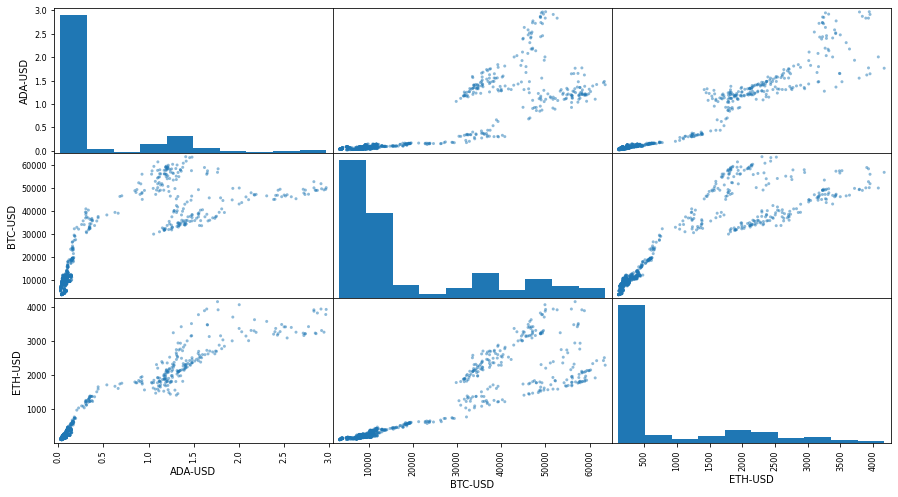

In [84]:
pd.plotting.scatter_matrix(data);

---

## Gráfico de Regressão Parcial ou de Variável Agregada

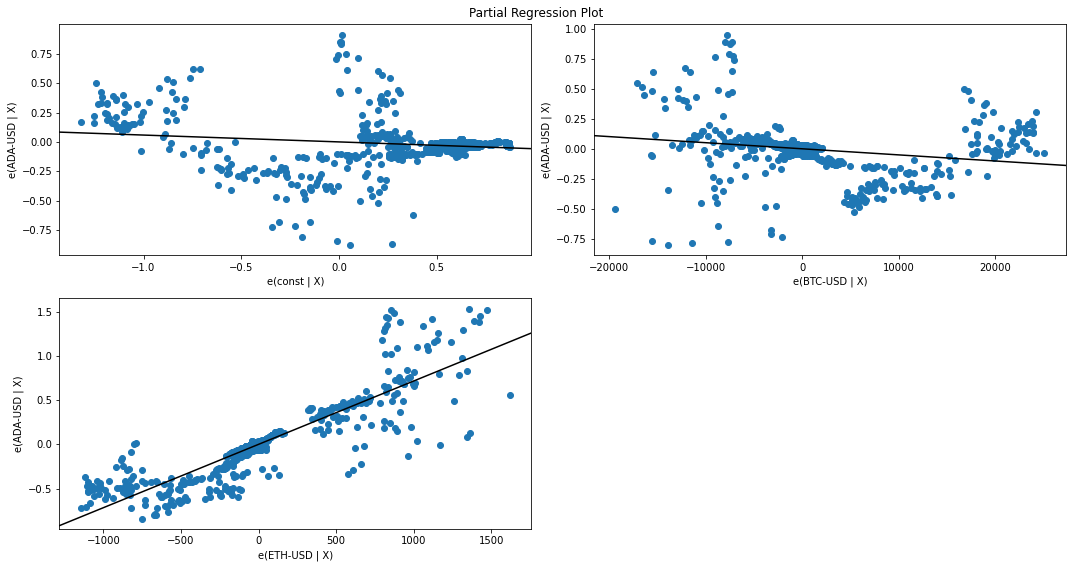

In [85]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(price_OLS_model, fig=fig);

---

## Gráfico de Resíduos vs Ajustados
<p><strong>Premissa de Homocedasticidade:</strong> o <strong>gráfico dos Resíduos vs Ajustados</strong> confirma a Homocedasticidade das variáveis para valores ajustados acima de 0.5;</p>
 <p><strong>Premissa da Não Endogeneidade:</strong> o<strong> gráfico dos Resíduos vs Ajustados</strong> nos mostra que não há correlação entre os Erros para valores ajustados acima de 0.5, garantindo, dessa forma, a premissa de <strong>Não Endogeneidade acima de 0.5</strong>.</p>

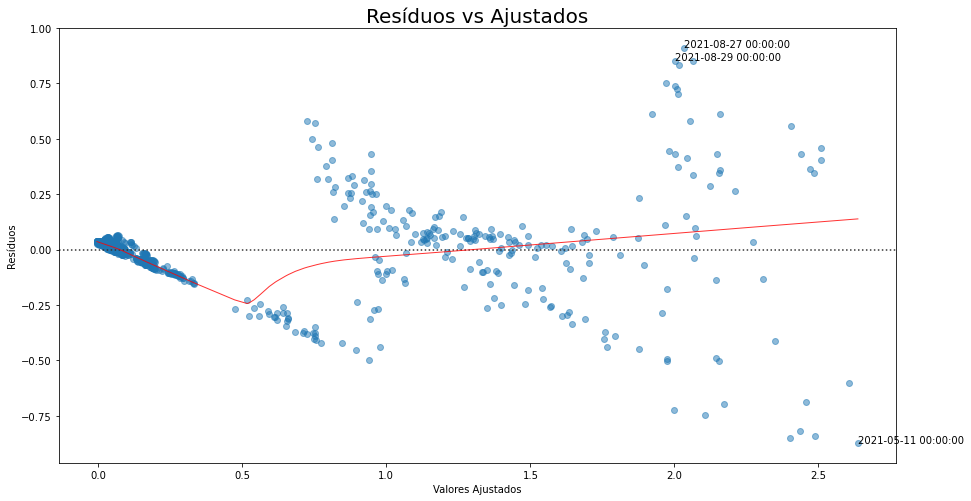

In [86]:
graph_plotter = graphs.AssumptionGraphs(price_OLS_model)
graph_plotter.plot_residual_fitted_values(y1)

---

## Gráfico QQ
<p><strong>Premissa da Normalidade:</strong> a grande maioria dos valores no <strong>gráfico QQ</strong> garante a premissa de normalidade para o <strong>Modelo OLS</strong>.</p>

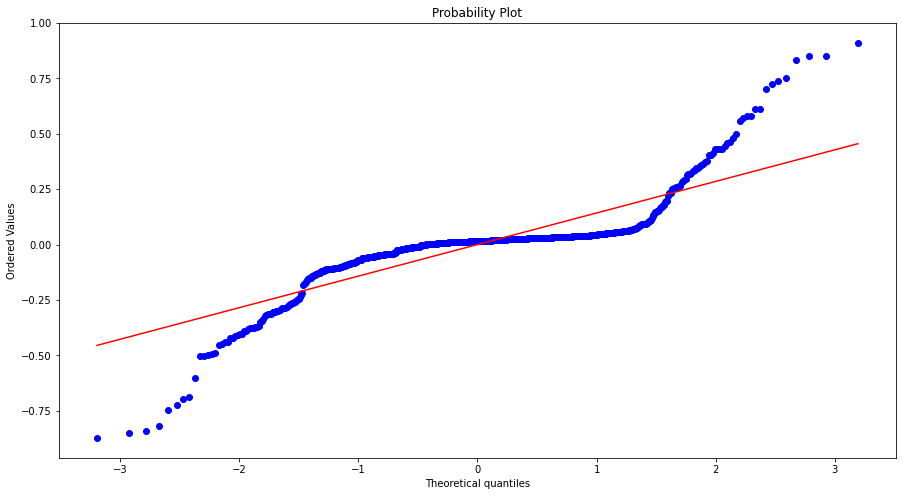

In [87]:
graph_plotter.plot_qq()

---

## Gráfico Scale-Location
<p><strong>Premissa de Erros não autocorrelacionados:</strong> no <strong>gráfico Scale-Location</strong> pode-se auferir que não há tendência nos erros para valores ajustados acima de 0.5, garantindo, desta maneira, a premissa de Erros Não Autocorrelacionados acima de 0.5.</p>

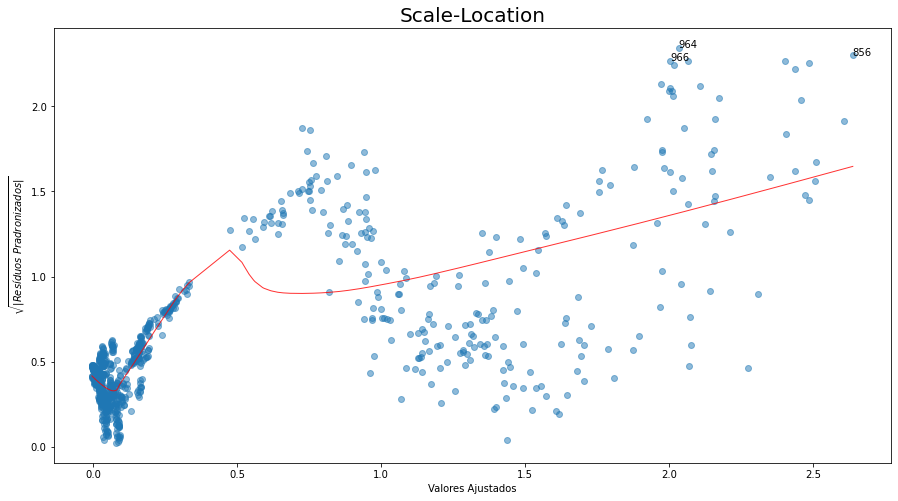

In [88]:
graph_plotter.plot_scale_location()

---

## Gráficos para Inflação da Variância
<p><strong>Premissa da Não Multicolinearidade:</strong> o <strong>Fator de Inflação da Variância</strong> apresentam VIF maior do que 5 o que <strong>não garante a premissa de Não Multicolinearidade</strong>.</p></ol>

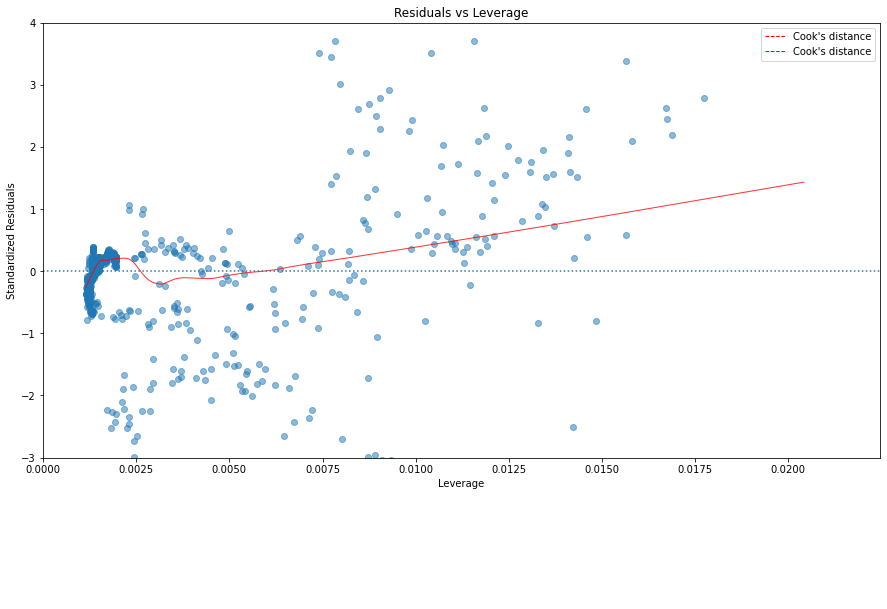

In [89]:
graph_plotter.plot_influence()

In [90]:
[variance_inflation_factor(X1.values, i)
 for i in range(X1.shape[1])]

[2.5108984424394607, 5.69850838579816, 5.69850838579816]

In [91]:
pd.Series([variance_inflation_factor(X1.values,i)
         for i in range(X1.shape[1])], index=X1.columns)

const      2.510898
BTC-USD    5.698508
ETH-USD    5.698508
dtype: float64

---

#### [Voltar para o Sumário](#0)

---

## 7.4 Previsão de Preços utilizando o Facebook Prophet <a id="7-4"></a>

#### O profeta do Facebook foi criado para funcionar como uma ferramenta para a maioria das previsões gerais de séries temporais. É fácil de usar e ensina aprendizado de máquina para iniciantes de forma intuitiva.

#### O Facebook também permite que aqueles com conhecimento de domínio não sejam bloqueados ao obterem uma resposta e algumas informações adicionais que podem render algum valor.

#### Se você usar outras bibliotecas de previsão. Essas outras bibliotecas fizeram muito do trabalho básico e previram que têm dois métodos automatizados na biblioteca, um é auto.arima e o outro é suavização exponencial. Ambos realizam um processo de seleção de modelo, de modo que estão realmente tentando fazer muito trabalho para você e eliminando muitas dificuldades na construção do modelo, mas às vezes você obteria modelos de desempenho ruim se simplesmente aplicasse a um conjunto de dados. Como os resultados nem sempre são intuitivos o suficiente para melhorar a previsão.

#### O profeta do Facebook é capaz de visualizar características significativas nas séries temporais, como tendências, outliers, sazonalidade, etc. Além disso, o método de previsão é robusto o suficiente para lidar com quaisquer valores ausentes.

#### Portanto, normalmente, com problemas de série temporal, você desejaria modelar o processo gerador de como essa série temporal seria criada. Isso se torna difícil de escrever, um modelo gerador para um processo de série temporal é como a cada estado um novo problema vai acontecer e vai depender do passado de alguma forma. Em vez disso, o Facebook construiu um modelo discriminativo, que é um modelo de série temporal simples decomposto. É um modelo aditivo generalizado, então cada componente é aditivo, mas os componentes individuais podem não ser lineares.

   <strong> y (t) = {tendência_de_ações} (t) + {sazonalidade} (t) + {efeitos_férias} (t) + {ruído}</strong>

#### O primeiro componente é uma tendência por partes, que pode ser uma tendência logística ou uma tendência linear, e isso explicará basicamente a rapidez com que a série temporal está crescendo ou diminuindo.

#### O segundo componente é a sazonalidade, que é algo que acontece regularmente em ciclos. Existem alguns efeitos de férias e redução de ruído incluídos.

#### A tendência por partes é desenvolvida usando mudanças de tendência regularizadas L1. A sazonalidade é desenvolvida usando a série de Fourier. E os efeitos das férias são desenvolvidos usando variáveis ​​dummy. Eles não são muito complexos.

#### A tendência linear por partes ou tendência logística é desenvolvida gerando um grupo de pontos de mudança candidatos. Estes são os pontos em que o modelo está pensando que poderia mudar sua trajetória, então eles colocam um Laplace prior, que é como um esparso anterior, que vai assumir que na maioria das vezes essas mudanças são zero, mas algumas vezes ele vai para permitir que ele mude. Então, os dados vão basicamente nos dizer quando a série temporal mudou sua trajetória, o que é um recurso muito bom. Portanto, o profeta está aprendendo com os dados como extrapolar localmente a partir da modelagem dos dados anteriores.

[Fonte](https://www.youtube.com/watch?v=pOYAXv15r3A&feature=youtu.be)

---

### 7.4.1 Previsão do Preço de Fechamento para o Projeto Cardano [ADA-USD] <a id="7-4-1"></a>

In [92]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [93]:
#importando profeta e modelo de ajuste
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [94]:
#Funções para automatizar gráficos de profetas para cada série
def fit_model(df):
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    return m, forecast, future

def fb_plots(m, fore):
    return plot_plotly(m, forecast)

def fb_subplots(m, fore):
    return m.plot(forecast), m.plot_components(forecast)

In [95]:
cardano_usd = yf.Ticker('ADA-USD').history(period='max').reset_index()[['Date','Open','High','Low','Close','Volume']]

In [96]:
ada_preço = cardano_usd.drop(cardano_usd.columns[[1,2,3,5]], axis=1)
ada_vol = cardano_usd.drop(cardano_usd.columns[[1,2,3,4]], axis=1)
ada_preço.columns = ["ds","y"]
ada_vol.columns = ["ds","y"]
ada_preço.index = ada_preço['ds']
ada_preço = ada_preço.loc['2019-01-02':]
ada_preço.head(3)

,ds,y
ds,,
2019-01-02,2019-01-02,0.045258
2019-01-03,2019-01-03,0.042682
2019-01-04,2019-01-04,0.043812


In [97]:
model, forecast, future = fit_model(ada_preço)

In [98]:
future.tail()

,ds
1343,2022-09-10
1344,2022-09-11
1345,2022-09-12
1346,2022-09-13
1347,2022-09-14


In [99]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1343,2022-09-10,4.898829,4.533711,5.267082
1344,2022-09-11,4.891928,4.526899,5.265697
1345,2022-09-12,4.876533,4.502147,5.249160
1346,2022-09-13,4.866115,4.499069,5.231442
1347,2022-09-14,4.859916,4.488636,5.246211


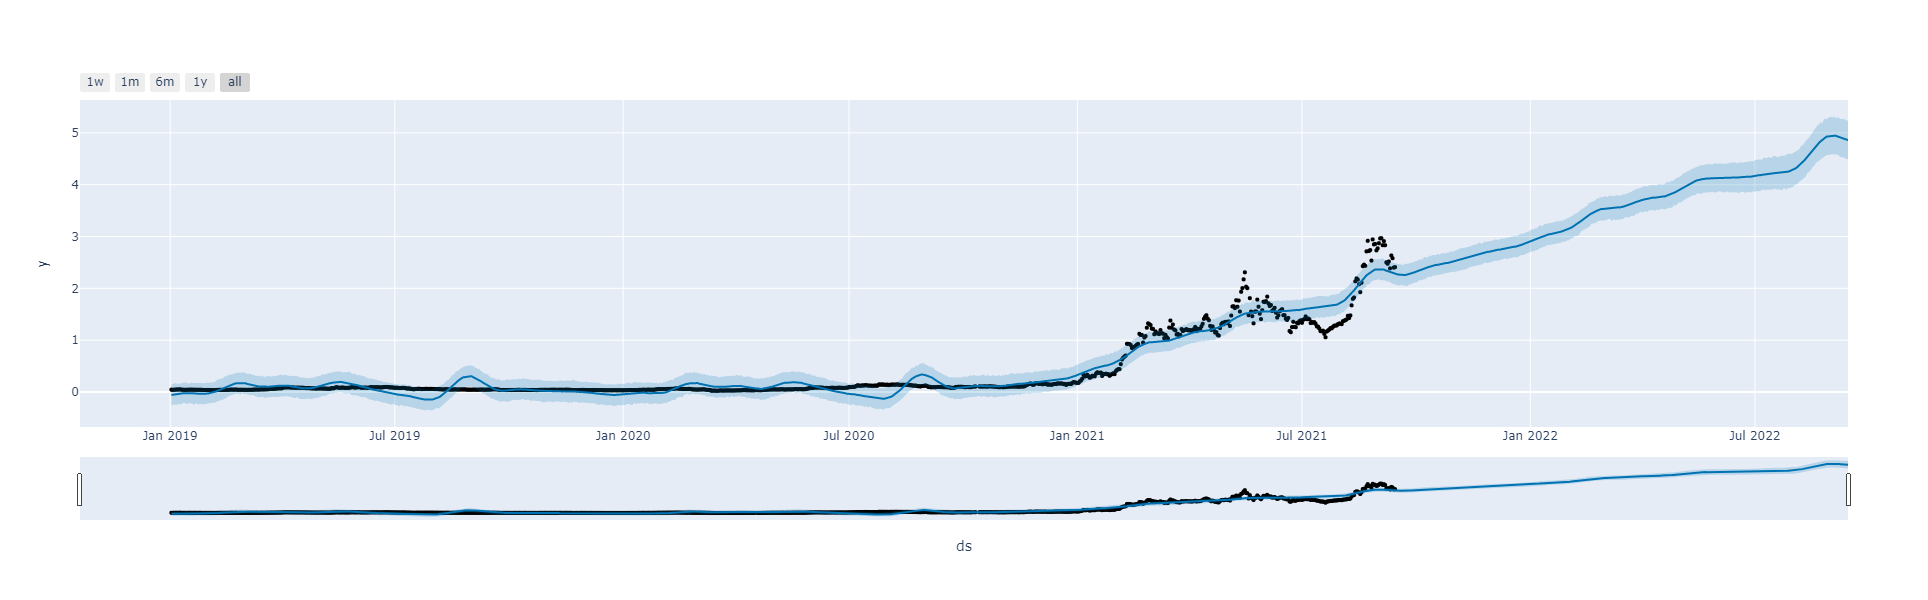

In [100]:
fb_plots(model, forecast)

The forecast is expecting bitcoin to continue rising in value. There has a been a new spike at the end of 2020 that added to this prediction. 

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

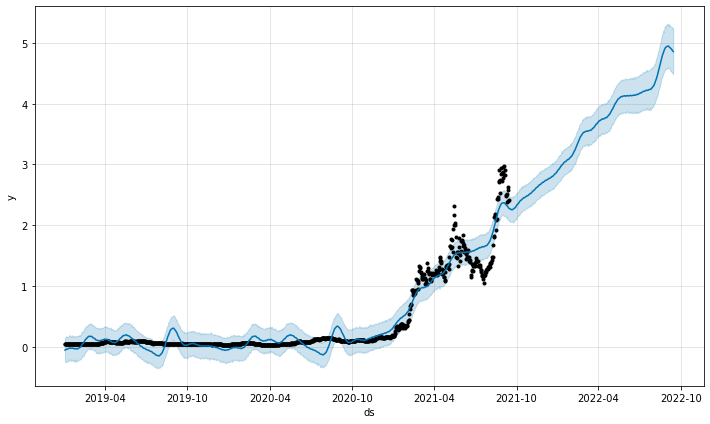

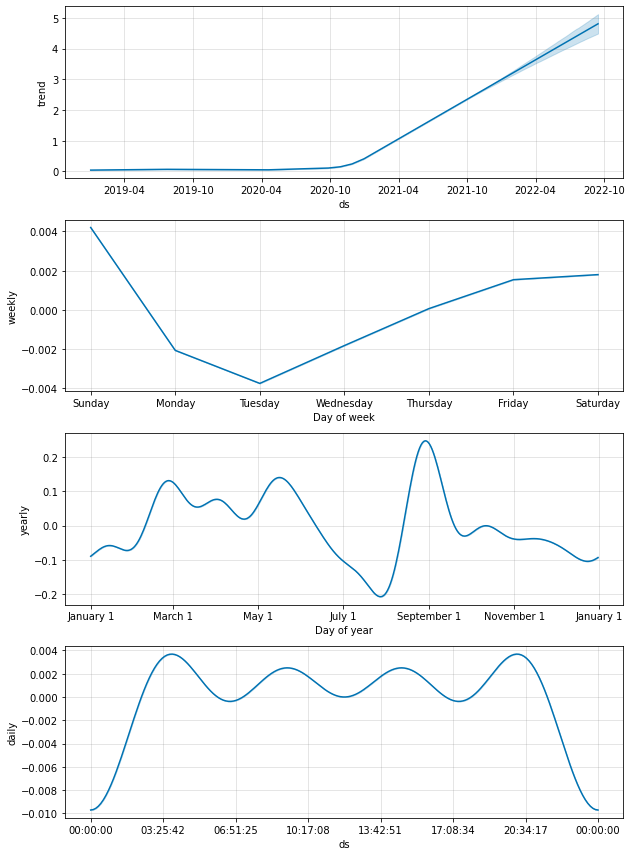

In [101]:
fb_subplots(model, forecast)

---

### 7.4.2 Previsão do Volume para o Projeto Cardano [ADA-USD] <a id="7-4-1"></a>

In [102]:
ada_vol.head()

,ds,y
0,2017-10-01,50068700
1,2017-10-02,57641300
2,2017-10-03,16997800
3,2017-10-04,9000050
4,2017-10-05,5562510


In [103]:
model, forecast, future = fit_model(ada_vol)

In [104]:
future.tail()

,ds
1801,2022-09-10
1802,2022-09-11
1803,2022-09-12
1804,2022-09-13
1805,2022-09-14


In [105]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1801,2022-09-10,1.032600e+10,8.529996e+09,1.212403e+10
1802,2022-09-11,1.029841e+10,8.515339e+09,1.199176e+10
1803,2022-09-12,1.029633e+10,8.436352e+09,1.208896e+10
1804,2022-09-13,1.035468e+10,8.533971e+09,1.221117e+10
1805,2022-09-14,1.036504e+10,8.523755e+09,1.211525e+10


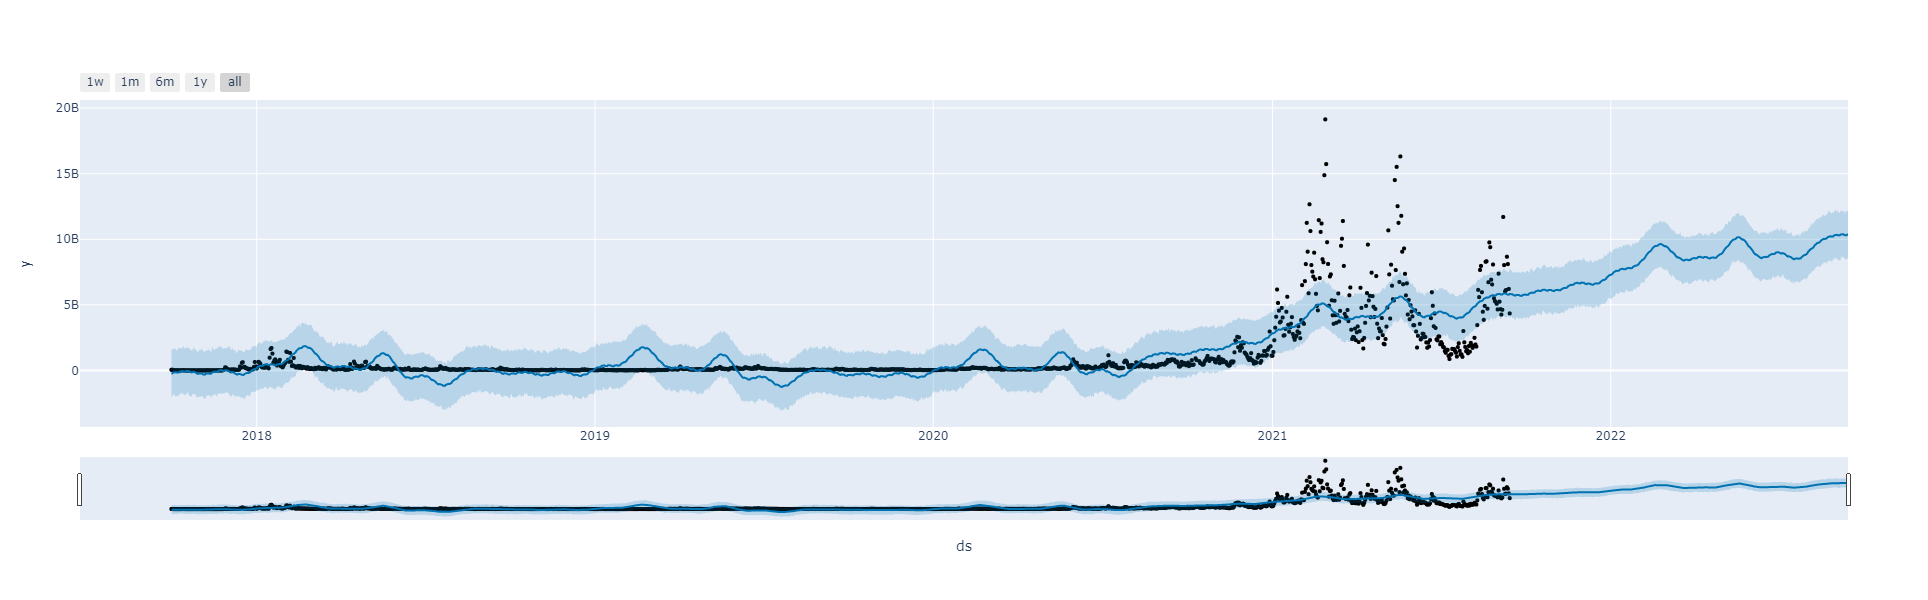

In [106]:
fb_plots(model, forecast)

We are easily able o view a forecast for the volume of bitcoin. The forecast is predicting the trend to countine to rise. We can most likely attribute this to the levels of users trading on robinhood or other platforms. There is growing demand and as more individuals buy in the more bitcoin is in cirruculation throughout the economy.

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

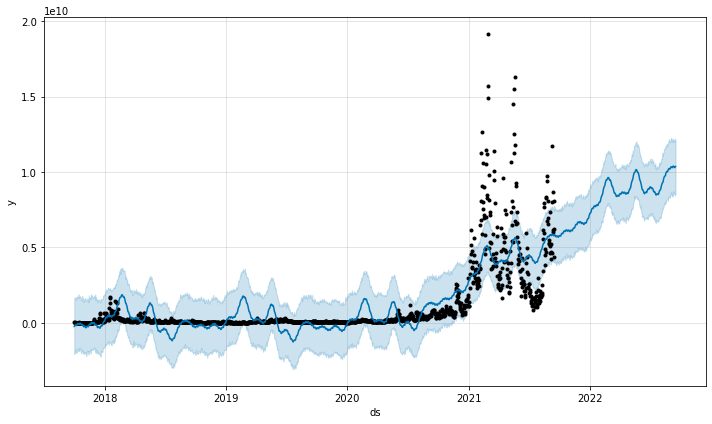

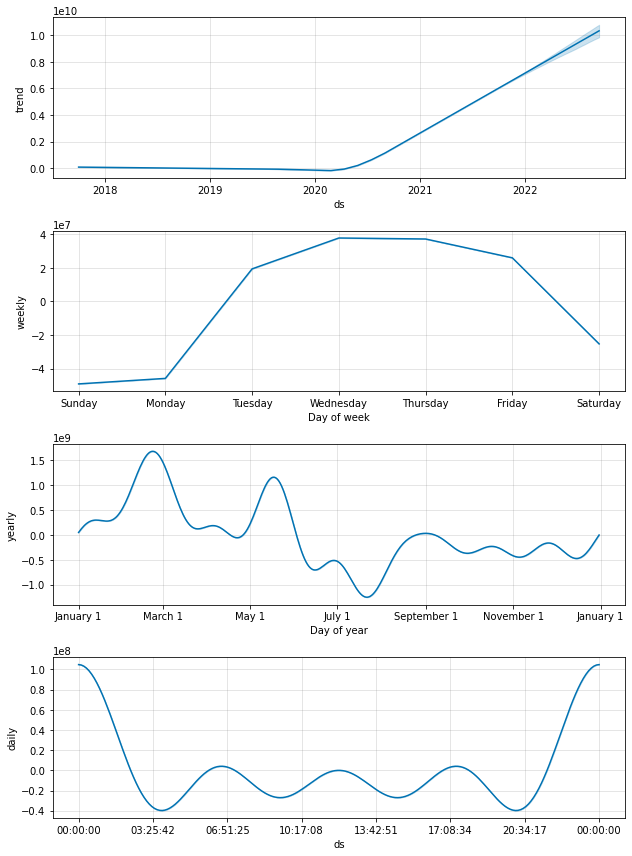

In [107]:
fb_subplots(model, forecast)

#### A modelagem do FBprophet nos permite visualizar rapidamente as previsões para uma série individual. Aqui, fizemos para o preço de fechamento em dólar da Cardano e o volume de transações.

#### Essas variáveis são importantes porque os analistas estão considerando o aumento do preço devido à facilidade dos indivíduos poderem negociar via robinhood e outras plataformas digitais em tempo real sem mediadores.

#### Além disso, a criptomoeda ADA é deflacionária uma vez que possuiu uma quantidade finita de tokens.

#### De acordo com as previsões para cada série, pelo menos no futuro próximo, continuaremos a ver a Cardano aumentar de valor.

---

#### [Voltar para o Sumário](#0)

---

## 8. Análise Macro Econômica dos Mercacos (Into The Block)<a id="8"></a>
##### Obs: dados referentes a Junho de 2020 até Junho de 2021

### 8.1 Mercados Ocidentais<a id="8-1"></a>

#### 8.1.1 Price Performance Western Markets<a id="8-1-1"></a>

<img src='Indicadores INTO THE BLOCK/Price Performance Western Markets.JPG'>

#### 8.1.2 Volatility Western Markets<a id="8-1-2"></a>
    

<img src='Indicadores INTO THE BLOCK/Volatility Western Markets.JPG'>

#### 8.1.3 BTC Historical Correlation Western Markets<a id="8-1-3"></a>
     

<img src='Indicadores INTO THE BLOCK/BTC Historical Correlation Western Markets.JPG'>

#### 8.1.4 ETH Historical Correlation Western Markets<a id="8-1-4"></a>
    

<img src='Indicadores INTO THE BLOCK/ETH Historical Correlation Western Markets.JPG'>

#### 8.1.5 Sharpe Ratio Western Markets<a id="8-1-5"></a>
    

<img src='Indicadores INTO THE BLOCK/Sharpe Ratio Western Markets.JPG'>

#### 8.1.6 Sortino Ratio Western Markets<a id="8-1-6"></a>

<img src='Indicadores INTO THE BLOCK/Sortino Ratio Western Markets.JPG'>

---

#### [Voltar para o Sumário](#0)

---

### 8.2 Mercados Orientais<a id="8-2"></a>

#### 8.2.1 Price Performance Eastern Markets<a id="8-2-1"></a>

<img src='Indicadores INTO THE BLOCK/Price Performance Eastern Markets.JPG'>

#### 8.2.2 Volatility Eastern Markets<a id="8-2-2"></a>

<img src='Indicadores INTO THE BLOCK/Volatility Eastern Markets.JPG'>

#### 8.2.3 BTC Historical Correlation Eastern Markets<a id="8-2-3"></a>

<img src='Indicadores INTO THE BLOCK/BTC Historical Correlation Eastern Markets.JPG'>

#### 8.2.4 ETH Historical Correlation Eastern Markets<a id="8-2-4"></a>

<img src='Indicadores INTO THE BLOCK/ETH Historical Correlation Eastern Markets.JPG'>

#### 8.2.5 Sharpe Ratio Eastern Markets<a id="8-2-5"></a>

<img src='Indicadores INTO THE BLOCK/Sharpe Ratio Eastern Markets.JPG'>

#### 8.2.6 Sortino Ratio Eastern Markets<a id="8-2-6"></a>

<img src='Indicadores INTO THE BLOCK/Sortino Ratio Eastern Markets.JPG'>

---

#### [Voltar para o Sumário](#0)

---

### 8.3 Mercados de Cryptomoedas<a id="8-3"></a>

#### 8.3.1 Price Performance Crypto Related Markets<a id="8-3-1"></a>

<img src='Indicadores INTO THE BLOCK/Price Performance Crypto Related Markets.JPG'>

#### 8.3.2 Volatility Crypto Related Markets<a id="8-3-2"></a>

<img src='Indicadores INTO THE BLOCK/Volatility Crypto Related Markets.JPG'>

#### 8.3.3 BTC Historical Correlation Crypto Related Markets<a id="8-3-3"></a>

<img src='Indicadores INTO THE BLOCK/BTC Historical Correlation Crypto Related Markets.JPG'>

#### 8.3.4 ETH Historical Correlation Crypto Related Markets<a id="8-3-4"></a>

<img src='Indicadores INTO THE BLOCK/ETH Historical Correlation Crypto Related Markets.JPG'>

#### 8.3.5 Sharpe Ratio Crypto Related Markets<a id="8-3-5"></a>

<img src='Indicadores INTO THE BLOCK/Sharpe Ratio Crypto Related Markets.JPG'>

#### 8.3.6 Sortino Ratio Crypto Related Markets<a id="8-3-6"></a>

<img src='Indicadores INTO THE BLOCK/Sortino Ratio Crypto Related Markets.JPG'>

---

#### [Voltar para o Sumário](#0)

---

### 8.4 Google Trends<a id="8-4"></a>

#### 8.4.1 Google Trends ADA, BTC e ETH 5YRS<a id="8-4-1"></a>

<img src='Indicadores INTO THE BLOCK/Google Trends ADA_BTC_ETH_5YRS.JPG'>

#### 8.4.2 Google Trends ADA 5YRS<a id="8-4-2"></a>

<img src='Indicadores INTO THE BLOCK/Google Trends ADA_5YRS.JPG'>

---

#### [Voltar para o Sumário](#0)

---

## 9. Conclusões e Sugestões de Investimento em Cryptomoedas  <a id="9"></a>
##### (O conhecimento e acompanhmento do mercado é fundamental.)

### 9.1 Como maximizar seus ganhos de investimento em cryptomoedas? <a id="9-1"></a>

#### Precauções:

#### Além da análise fundamentalista dos projetos alvo, é necessário ter uma noção de análise técnica para poder saber quando entrar e sair de um determinado projeto.

#### É importante também tomar cuidado com projetos novos que ainda não foram "testados" pelo tempo de mercado, uma vez que há muitos projetos que não representam nada real. 

#### São puramente especulativos. Conhecidos como "Shit Coins". Tomar cuidado também com possíveis golpes como falsas distribuições de criptomoedas.

#### Ficar atento aos endereços de transações que for utilizar pois, caso erre o endereço ou a blockchain de um operação o valor será perdido.

#### Para reduzir o risco de um portifólio, segundo Markovitz, em sua teoria moderna de portifolio, é essencial a diversificação dos investimentos em projetos com riscos e propostas diferentes.

#### Logo, ao investir certifique-se que parte de seu portifolio esteja em investimentos considerados mais "seguros" como Títulos do Governo, Imóveis, Ouro, etc...

#### A partir daí o dinheiro que for destinado ao mercado de criptomoedas também pode ser distribuído entre os projetos mais importantes no momento.

#### Levando em consideração os projetos que servem de referência para todo mercado, o Bitcoin, com 43.5% de dominâcia, e o Ethereum, com 18.2% de dominância.

#### Particularmente, prefiro um estratégia de Swing Trade focando mais nos gráficos semanais e diários.

#### Sendo assim, uma possível sugestão de Portifólio com Criptmoedas seria, por exemplo:

- **25% no Bitcoin (BTC)**

- **25% no Ethereum (ETH)**

- **25% na Cardano (ADA)**

- **10% na Solana (SOL)**

- **10% na Binance (BNB)**

- **5% na Litecoin (LTC)**

---

### 9.2 Quer investir em criptomoeda a longo prazo? <a id="9-2"></a>

#### Este tópico visa a facilitar o engajamento no mercado de cryptomoedas.

#### Será necessário abrir um conta em alguma Exchange e seguir todas as etapas de autenticação e segurança da plataforma escolhida.

#### Segue uma lista das principais Exchanges:

- https://accounts.binance.com/en/register [recomendo esta por ser a maior e melhor estruturada no momento]

- https://en.bithumb.com/member_operation/join

- https://www.huobi.com/en-us/register/?backUrl=%2Fen-us%2F

- https://www.coinbase.com/signup

#### Para análise Fundamentalista recomendo o site:

- https://www.intotheblock.com/blockchain-analytics

#### É importante, também, estudar análise técnica. 
- https://www.youtube.com/watch?v=eynxyoKgpng&t=5s

#### Plataformas para acompanhar o mercado de criptomoedas (permitem construir o portifolio traker para acompanhamento):

- https://coinmarketcap.com/homepage-v21/

- https://www.coingecko.com/en

- https://coinstats.app/

#### Plataforma de Gráficos:

- https://www.tradingview.com/

#### Sites com notícias sobre criptomoedas:

- https://cryptonews.com/

- https://cointelegraph.com/

- https://cryptopotato.com/crypto-news/

- https://www.coindesk.com/

### 9.3 Conclusões em relação ao Projeto Cardano [ADA] <a id="9-3"></a>

#### O Projeto Cardano liberou a Era Goguen e o acesso a Smart Contracts em seu Ecossistema em 12 de Agosto de 2021. Isso irá gerar um aumento considerável na demanda por parte das Instituições.  
#### Ainda há pela frente mais duas Eras para serem finalizadas e implementadas. 
#### A Era Basho, referente a Scaling, Optimization e Interoperability (Escalabilidade, Otimização e Interoperabilidade), também já foi parcialmente entregue, e a Era Voltaire, referente a Governança necessária para o ecossistema se tornar autosustentável.
#### Possui um equipe extremamente profissional e dedicada às propostas de melhoria de sua rede de Blockchain e vem provando sua capacidade entrega de tais atualizações e construção de novas parceriais e projetos ao redor do Mundo.
#### Como visto nas análises quantitativas, além de ser um projeto robusto, apresenta altas taxas de retorno sobre o investimento em médio e longo prazo.
#### Podemos notar que a Cardano foi a criptomoeda com maior retorno no período de 02/01/2019 até o momento com um ROI de 5127.97% de retorno. Superando até mesmo o retorno do portifólio fictício e o seu Índice Sortino de 1214.76%.
#### Enquanto o Bitcoin apresentou um retorno de 1074.53% para o mesmo período. O Ethereum apresentou 2045.62% para o mesmo período.
#### Sendo assim podemos concluir que vale a pena investir em criptomoedas a longo prazo.
#### Em relação a Cardano [ADA], apesar de ter apresentado períodos com índice sharpe negativo, conseguiu reverter tal tendência a partir de Julho de 2020 e, até mesmo, atingir um índice sharpe alto o suficiente para se equiparar ao Bitcoin, criptomoeda de referência do mercado, em meados de Março de 2021. Mantendo um índice maior do que 1 no presente momento.
#### Já na Simulação de Monte Carlo para Value at Risk e Conditional Value at Risk obteve valores ótimos em comparação aos possíveis ganhos no longo prazo. 
#### Na avaliação por múltiplos, o projeto Cardano apresentou um Índice Preço/Lucro muito baixo que indica o negligenciamento do mercado em relação a tal projeto por ser relativamente novo.
#### Isso se dá pois ainda não ocerreu uma adoção amplamente disseminada por parte das pessoas físicas, portanto, uma [ÓTIMA] oportunidade de investimento com boas perspectivas de valorização.
#### Para fazer uma analogia com a Bolsa de Valores de São Paulo, os ativos listados no Ibovespa começaram 2020 com um P/L médio em torno de 16, antes da Pandemia.
#### Já o Market Cap Ratio é usado como parametro para possíveis projeções. A partir  das criptomoedas de referência do mercado é possível indicar o espaço de crescimento dos projetos que ainda não atingiram determinado valor de Market Cap.
#### Desta forma, podemos observar que [ADA/BTC] Market Cap Ratio está em 0.10 e [ADA/ETH] Market Cap Ratio está em 0.25. Logo, O Projeto Cardano, em comparação aos Projetos Dominantes, possui um grande potencial.
#### O Ethereum apresenta um [ETH/BTC] Market Cap Ratio de 0.24, assim, como a Cardano, também possui grande potencial.
#### O modelo CAPM (Capital Asset Pricing Model) previu um retorno esperado de 4,286.2%, porém, o projeto Cardano está, no momento desta redação, com um ROI de 5127.97% para o período analisado, de 02 de Janeiro de 2019 até os dias de hoje.

#### A modelagem do FBprophet nos permite visualizar rapidamente as previsões para uma série individual. Aqui, fizemos para o preço de fechamento em dólar da Cardano e o volume de transações.
#### Essas variáveis são importantes porque os analistas estão considerando o aumento do preço devido à facilidade dos indivíduos poderem negociar via robinhood e outras plataformas digitais em tempo real sem mediadores.
#### Além disso, a criptomoeda ADA é deflacionária uma vez que possuiu uma quantidade finita de tokens. De acordo com as previsões para cada série, pelo menos no futuro próximo, continuaremos a ver a Cardano aumentar de valor.
#### Também oferece “fundos de investimentos” em suas carteiras digitais por ser um protocolo PoS (Proof of Stake) onde os usuários podem alocar suas ADA´s para produzirem mais criptomoedas ADA proporcionalmente a quantidade de moeda “estocada”.
#### Por fim, o Projeto Cardano, está se disseminando pelo mundo com muitos projetos em diversos país, tendo como um grande foco a África.
#### Atualmente, a Cardano é mais procurada no google do que o próprio Bitcoin. 



---

#### [Voltar para o Sumário](#0)

---

## 10. Referências <a id="10"></a>

- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python
- http://www.businessinsider.com/invest-cryptocurrency-blockchain-technology-2017-8
- https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD
- https://finance.yahoo.com/quote/ETH-USD/history?p=ETH-USD
- https://finance.yahoo.com/quote/ADA-USD/history?p=ADA-USD
- https://finance.yahoo.com/quote/BNB-USD/history?p=BNB-USD
- https://finance.yahoo.com/quote/DOT1-USD/history?p=DOT1-USD
- https://finance.yahoo.com/quote/XRP-USD/history?p=XRP-USD
- https://finance.yahoo.com/quote/BCH-USD/history?p=BCH-USD
- https://finance.yahoo.com/quote/LTC-USD/history?p=LTC-USD
- https://finance.yahoo.com/quote/LINK-USD/history?p=LINK-USD
- https://finance.yahoo.com/quote/SOL-USD/history?p=SOL-USD
- https://www.kdnuggets.com/2020/01/stock-market-forecasting-time-series-analysis.html
- https://academy.binance.com/en
- https://www.youtube.com/
- https://www.bloomberg.com/markets/rates-bonds/government-bonds/us
- https://www.investopedia.com/articles/07/sharpe_ratio.asp
- https://comoinvestir.thecap.com.br/indice-de-sortino/
- https://www.coindesk.com/news
- https://cointelegraph.com/
- https://cryptopotato.com/crypto-news/
- https://coinmarketcap.com/headlines/news/
- https://www.intotheblock.com/blockchain-analytics
- https://coinmarketcap.com
- https://www.coingecko.com/en
- https://www.investopedia.com/cryptocurrency-news-5114163
- https://www.dicionariofinanceiro.com/o-que-e-capm/
- Albon, Chris, Machine Learning with Python Cookbook: Practical Solutions from Preprocessing to Deep Learning – First Edition. Published by O’Reilly Media, Inc., 1005 Gravenstein Highway North, Sebastopol, CA 95472.
- Bouzada Marco Aurélio Carino, Métodos Quantitativos Aplicados a Casos Reais - 1. ed. - Rio de Janeiro: Elsevier, 2013.
- Brandão, Amanda Lemette T.,  Sistemas de Apoio à Decisão, Introdução ao Python, Business Intelligence Master: Sistemas Inteligentes de Apoio à Negócios, PUC-RJ, 2019-2021.
- Damodaran, Aswath, Investment valuation: tools and techniques for determining the value of any asset / Aswath Damodaran. – Third Edition - New Jersey: John Wiley & Sons, Inc., Hoboken, 2012.
- Grus, Joel, Data Science from Scratch – First Edition. Published by O’Reilly Media, Inc., 1005 Gravenstein Highway North, Sebastopol, CA95472.
- Martelli, Alex, Ravenscroft, Anna, and Holden, Steve, Python in a Nutshell – Third Edition, Published by O’Reilly Media, Inc., 1005 Gravenstein Highway North, Sebastopol, CA 95472.
- Mendoza , Leonardo Alfredo Forero e Kohler, Manoela, Previsão de Séries e Inferência por Redes Neurais, Business Intelligence Master: Sistemas Inteligentes de Apoio à Negócios, PUC-RJ, 2019-2021.
- Kohler, Manoela e Borges, Felipe, Apoio à Decisão Sob Incerteza, Business Intelligence Master: Sistemas Inteligentes de Apoio à Negócios, PUC-RJ, 2019-2021.
- Kohler, Manoela, Data Mining, Business Intelligence Master: Sistemas Inteligentes de Apoio à Negócios, PUC-RJ, 2019-2021.
- Ramalho, Luciano Gama de Sousa, Fluent Python – First Edition. Published by O’Reilly Media, Inc., 1005 Gravenstein Highway North, Sebastopol, CA 95472.
- Samanez, Carlos Patricio, Engenharia econômica / Carlos Patricio Samanez. -- São Paulo: Pearson Prentice Hall, 2009.
- Samanez, Carlos Patricio, Matemática financeira / Carlos Patricio Samanez. - 5. ed. - São Paulo: Pearson Prentice Hall, 2010.
- Strachan, Guilherme, Métodos Estatísticos de Apoio à Decisão, Business Intelligence Master: Sistemas Inteligentes de Apoio à Negócios, PUC-RJ, 2019-2021.
- Swan, Melanie, Blockchain: Blueprint for a New Economy - First Edition – Published by O´Reilly Media, Inc., 1005 Gravenstein Highway North, Sebastopol, CA 95472. 




***